<a href="https://colab.research.google.com/github/wonjae124/2021_Lab_project/blob/main/Stack_Auto_encoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch 
import torchvision
from torchvision import transforms
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else"cpu")
dataset = torchvision.datasets.MNIST('./data',download=True, train=True,
                                     transform = transforms.ToTensor())
testset = torchvision.datasets.MNIST('./data',download=True, train=False,
                                     transform = transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(dataset, batch_size = 50, shuffle = True)

In [ ]:
 class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder,self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(784,128), ##nn.Linear에 넣어주기 위해 입력 이미지(1,28,28)를 일렬로 펴서 받아 들인다. 따라서, 인코더 부분에 크기가 784(28X28)인 벡터 하나가 들어온다.
            nn.ReLU(),
            nn.Linear(128, 32),
            nn.ReLU(),
            nn.Linear(32,10), #인코더를 거친 잠재 변수의 크기는 10이다.
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(10, 32),
            nn.ReLU(),
            nn.Linear(32, 128),
            nn.ReLU(),
            nn.Linear(128, 28*28),
            nn.Sigmoid() # ToTensor의 정규화를 통해서 마침 이미지의 픽셀값은 0 이상 1이하다. 여기에 nn.sigmoid()를 이용해 범위를 정해 수렴을 빨리 할 수 있다. 
        )

    def forward(self, x): #forward에서는 메소드를 연산하는 순서를 정해준다. 
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [ ]:
model = Autoencoder().to(device)
criterion = nn.MSELoss() #입력 이미지와 유사한 출력 이미지를 얻는 것이므로 MSE 사용한다.
optimizer = optim.Adam(model.parameters(),lr = 1e-04)

In [ ]:
for epoch in range(51):
    model.train()

    running_loss = 0.0
    for data in trainloader:
        inputs = data[0].to(device)
        optimizer.zero_grad()
        outputs = model(inputs.view(-1,28*28)) 
        outputs = outputs.view(-1,1,28,28)
        loss = criterion(inputs, outputs) #손실함수에서는 다시 원래 크기로 복원을 해야한다.
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    cost = running_loss / len(trainloader)


    print('[%d]loss:%.3f'%(epoch+1,cost))

[1]loss:0.079
[2]loss:0.054
[3]loss:0.045
[4]loss:0.040
[5]loss:0.036
[6]loss:0.034
[7]loss:0.033
[8]loss:0.032
[9]loss:0.031
[10]loss:0.030
[11]loss:0.030
[12]loss:0.029
[13]loss:0.029
[14]loss:0.028


KeyboardInterrupt: ignored

torch.Size([1, 28, 28])
torch.Size([28, 28])


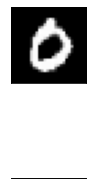

torch.Size([1, 28, 28])
torch.Size([28, 28])


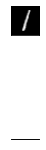

torch.Size([1, 28, 28])
torch.Size([28, 28])


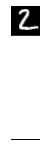

torch.Size([1, 28, 28])
torch.Size([28, 28])


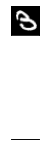

torch.Size([1, 28, 28])
torch.Size([28, 28])


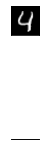

torch.Size([1, 28, 28])
torch.Size([28, 28])


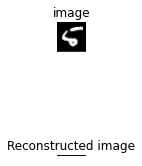

torch.Size([1, 28, 28])
torch.Size([28, 28])


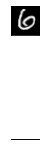

torch.Size([1, 28, 28])
torch.Size([28, 28])


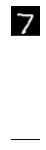

torch.Size([1, 28, 28])
torch.Size([28, 28])


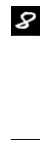

torch.Size([1, 28, 28])
torch.Size([28, 28])


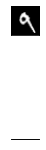

In [ ]:
n=10
plt.figure(figsize=(16,4.5))
targets = testset.targets.numpy()
t_idx = {i:np.where(targets == i)[0][0] for i in range(n)}



for i in range(n):
    ax = plt.subplot(2, n, i+1)
    img = testset[t_idx[i]][0]
    print(img.shape)
    img = img.to(device)

    model.eval()

    with torch.no_grad():
        rec_img = model(img.view(-1,28*28))
        img = img.reshape(28,28)
        print(img.size())
        plt.imshow(img, cmap = 'gist_gray')
        ax.get_xaxis().set_visible(False) 
        ax.get_yaxis().set_visible(False)          
        if i == n//2:
            ax.set_title('image')

        ax = plt.subplot(2, n, i+1+n)
        plt.imshow(rec_img, cmap = 'gray')
        ax.get_xaxis().set_visible(False) 
        ax.get_yaxis().set_visible(False)  
        
        if i == n//2:
            ax.set_title('Reconstructed image')
        plt.show()
    